In [1]:
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')


import pandas as pd

import livelossplot

In [2]:
#Read the Text File
with open('data.txt', 'r', encoding = "ISO-8859-1") as file: 
    text = file.read()

In [3]:
print(text)

From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory:
But thou contracted to thine own bright eyes,
Feed'st thy light's flame with self-substantial fuel,
Making a famine where abundance lies,
Thy self thy foe, to thy sweet self too cruel:
Thou that art now the world's fresh ornament,
And only herald to the gaudy spring,
Within thine own bud buriest thy content,
And, tender churl, mak'st waste in niggarding:Pity the world, or else this glutton be,
   To eat the world's due, by the grave and thee.
When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a tattered weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd th

In [4]:
#Split Text into Lines
with open('data.txt', 'r') as file:

    text = file.read()

lines = text.lower().split('\n')

In [5]:
lines[0:5]

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou contracted to thine own bright eyes,']

In [6]:
#Split Text into Words
from keras.preprocessing.text import text_to_word_sequence
text_to_word_sequence
words = text_to_word_sequence(text)

Using TensorFlow backend.


In [7]:
#Tokenize input Text
from keras.preprocessing.text import Tokenizer 
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(words)
tokens = tokenizer.word_index

In [8]:
print(tokens)

{'thou': 1, 'the': 2, 'thy': 3, 'and': 4, 'to': 5, 'that': 6, 'in': 7, 'of': 8, 'thee': 9, 'self': 10, 'be': 11, 'with': 12, 'for': 13, 'thine': 14, 'his': 15, 'when': 16, 'not': 17, 'but': 18, 'so': 19, 'beauty': 20, 'if': 21, 'which': 22, 'art': 23, 'world': 24, 'it': 25, 'from': 26, "beauty's": 27, 'a': 28, 'then': 29, 'all': 30, 'make': 31, 'is': 32, 'do': 33, 'as': 34, 'by': 35, 'time': 36, 'where': 37, 'or': 38, 'on': 39, 'were': 40, 'she': 41, 'one': 42, 'die': 43, 'sweet': 44, 'now': 45, 'this': 46, 'will': 47, 'see': 48, 'another': 49, 'dost': 50, 'love': 51, 'why': 52, 'doth': 53, 'still': 54, 'ten': 55, 'i': 56, 'should': 57, 'eyes': 58, 'look': 59, 'who': 60, 'age': 61, 'those': 62, 'what': 63, 'times': 64, 'shouldst': 65, 'own': 66, 'fresh': 67, 'shall': 68, 'being': 69, 'treasure': 70, 'an': 71, 'shame': 72, 'how': 73, 'more': 74, 'use': 75, 'fair': 76, 'my': 77, 'glass': 78, 'whose': 79, 'some': 80, 'he': 81, 'her': 82, 'shalt': 83, 'live': 84, 'single': 85, 'lives': 86,

In [9]:
# just checking first 5 pairs 
first5pairs = {k: tokens[k] for k in list(tokens)[:5]}
first5pairs

{'thou': 1, 'the': 2, 'thy': 3, 'and': 4, 'to': 5}

In [10]:
#Get the Vocabulary Size
vocabulary_size = len(tokens) + 1 
print(vocabulary_size)

582


In [11]:
#Build Sequences
sequences = tokenizer.texts_to_sequences(lines)

In [12]:
print(sequences)

[[26, 189, 190, 191, 97, 98], [6, 99, 27, 192, 100, 101, 43], [18, 34, 2, 193, 57, 35, 36, 194], [15, 102, 103, 100, 104, 15, 195], [18, 1, 196, 5, 14, 66, 197, 58], [198, 3, 199, 200, 12, 10, 201, 202], [203, 28, 204, 37, 205, 105], [3, 10, 3, 206, 5, 3, 44, 10, 106, 207], [1, 6, 23, 45, 2, 107, 67, 208], [4, 209, 210, 5, 2, 211, 212], [108, 14, 66, 213, 214, 3, 215], [4, 102, 216, 217, 109, 7, 218, 219, 2, 24, 38, 110, 46, 220, 11], [5, 221, 2, 107, 222, 35, 2, 223, 4, 9], [16, 224, 225, 68, 226, 3, 227], [4, 228, 111, 229, 7, 3, 27, 230], [3, 231, 232, 233, 19, 234, 39, 45], [47, 11, 28, 235, 236, 8, 237, 238, 239], [29, 69, 240, 37, 30, 3, 20, 105], [37, 30, 2, 70, 8, 3, 112, 241], [5, 242, 108, 14, 66, 111, 243, 58], [40, 71, 30, 244, 72, 4, 245, 113], [73, 114, 74, 113, 246, 3, 27, 75], [21, 1, 247, 248, 249, 76, 115, 8, 250], [68, 116, 77, 117, 4, 31, 77, 118, 251, 252], [253, 15, 20, 35, 254, 14], [46, 40, 5, 11, 119, 120, 16, 1, 23, 118], [4, 48, 3, 121, 255, 16, 1, 256, 25, 1

In [13]:
list_ = [26, 189, 190, 191, 97, 98]
for k, v in tokens.items():    
    if v in list_:
        print(k)

from
desire
increase
fairest
creatures
we


In [14]:
#Build Subsequences
subsequences = []
for sequence in sequences:
    for i in range(1, len(sequence)): 
        subsequence = sequence[:i+1] 
        subsequences.append(subsequence)

In [15]:
subsequences[0:6]

[[26, 189],
 [26, 189, 190],
 [26, 189, 190, 191],
 [26, 189, 190, 191, 97],
 [26, 189, 190, 191, 97, 98],
 [6, 99]]

In [16]:
#Pad the Subsequence
from keras.preprocessing.sequence import pad_sequences 
sequence_length = max([len(sequence) for sequence in sequences])
sequences = pad_sequences(subsequences, maxlen=sequence_length, padding='pre')

In [17]:
sequences[0:6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         26, 189],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  26,
        189, 190],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  26, 189,
        190, 191],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  26, 189, 190,
        191,  97],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  26, 189, 190, 191,
         97,  98],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          6,  99]])

In [18]:
x, y = sequences[:,:-1],sequences[:,-1]

In [19]:
x

array([[  0,   0,   0, ...,   0,   0,  26],
       [  0,   0,   0, ...,   0,  26, 189],
       [  0,   0,   0, ...,  26, 189, 190],
       ...,
       [  0,   0,   0, ..., 150,  16,  81],
       [  0,   0,   0, ...,  16,  81, 580],
       [  0,   0,   0, ...,  81, 580,   9]])

In [20]:
y[-1]

581

In [21]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes=vocabulary_size)

In [22]:
y[0] # find 1, it should be at 189 index! -- Kind of one-hot-encoding and the columns/elements 
# in y is = vocabulary_size 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Creating network

In [23]:
from keras.models import Sequential 
model = Sequential()

In [24]:
from keras.layers import Embedding
model.add(Embedding(input_dim = vocabulary_size, # 582
                    output_dim = 100,
                    input_length = sequence_length - 1)) # input_dim

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
from keras.layers import LSTM 
model.add(LSTM(units = 100))

In [26]:
from keras.layers import Dropout, Dense 
model.add(Dropout(0.1))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [58]:
model.add(Dense(units=vocabulary_size, activation='softmax'))

In [59]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 14, 100)           58200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 582)               58782     
_________________________________________________________________
dense_3 (Dense)              (None, 582)               339306    
Total params: 536,688
Trainable params: 536,688
Non-trainable params: 0
_________________________________________________________________


In [61]:
plot_loss_RNN = livelossplot.PlotLossesKeras()

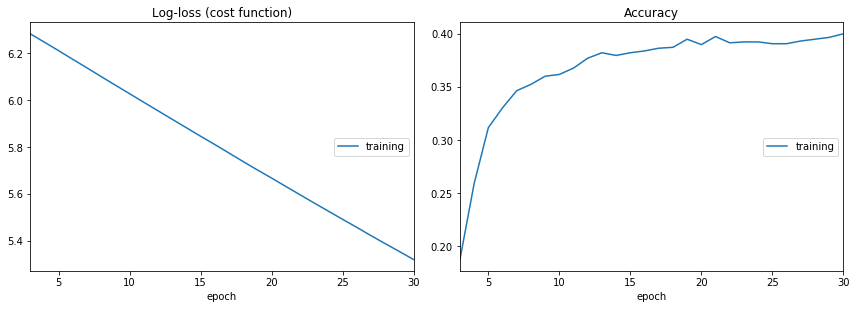

Log-loss (cost function):
training   (min:    5.319, max:    6.358, cur:    5.319)

Accuracy:
training   (min:    0.047, max:    0.400, cur:    0.400)


In [62]:
model.fit(x, y,
          callbacks = [plot_loss_RNN],
          epochs = 30) # Less epochs - Basic Model

In [46]:
model.fit(x, y, epochs=500)##500)

Epoch 1/500
1178/1178 [==============================] - 1s 679us/step - loss: 1.2736 - acc: 0.8226
Epoch 2/500
1178/1178 [==============================] - 1s 617us/step - loss: 1.2195 - acc: 0.8268
Epoch 3/500
1178/1178 [==============================] - 1s 677us/step - loss: 1.1628 - acc: 0.8311
Epoch 4/500
1178/1178 [==============================] - 1s 729us/step - loss: 1.0945 - acc: 0.8625
Epoch 5/500
1178/1178 [==============================] - 1s 690us/step - loss: 1.0510 - acc: 0.8582
Epoch 6/500
1178/1178 [==============================] - 1s 716us/step - loss: 0.9996 - acc: 0.8633
Epoch 7/500
1178/1178 [==============================] - 1s 602us/step - loss: 0.9491 - acc: 0.8710
Epoch 8/500
1178/1178 [==============================] - 1s 813us/step - loss: 0.9035 - acc: 0.8778
Epoch 9/500
1178/1178 [==============================] - 1s 1ms/step - loss: 0.8736 - acc: 0.8752
Epoch 10/500
1178/1178 [==============================] - 1s 730us/step - loss: 0.8239 - acc: 0.8871
E

1178/1178 [==============================] - 1s 742us/step - loss: 0.1737 - acc: 0.9194
Epoch 161/500
1178/1178 [==============================] - 2s 2ms/step - loss: 0.1732 - acc: 0.9253
Epoch 162/500
1178/1178 [==============================] - 1s 1ms/step - loss: 0.1748 - acc: 0.9278
Epoch 163/500
1178/1178 [==============================] - 2s 2ms/step - loss: 0.1838 - acc: 0.9253
Epoch 164/500
1178/1178 [==============================] - 2s 1ms/step - loss: 0.1722 - acc: 0.9244
Epoch 165/500
1178/1178 [==============================] - 1s 635us/step - loss: 0.1708 - acc: 0.9261
Epoch 166/500
1178/1178 [==============================] - 1s 569us/step - loss: 0.1793 - acc: 0.9211
Epoch 167/500
1178/1178 [==============================] - 1s 625us/step - loss: 0.1753 - acc: 0.9261
Epoch 168/500
1178/1178 [==============================] - 1s 670us/step - loss: 0.1789 - acc: 0.9194
Epoch 169/500
1178/1178 [==============================] - 2s 1ms/step - loss: 0.1676 - acc: 0.9244
Epoc

Epoch 239/500
1178/1178 [==============================] - 1s 540us/step - loss: 0.1809 - acc: 0.9228
Epoch 240/500
1178/1178 [==============================] - 1s 608us/step - loss: 0.1675 - acc: 0.9236
Epoch 241/500
1178/1178 [==============================] - 1s 536us/step - loss: 0.1723 - acc: 0.9194
Epoch 242/500
1178/1178 [==============================] - 1s 537us/step - loss: 0.1640 - acc: 0.9270
Epoch 243/500
1178/1178 [==============================] - 1s 527us/step - loss: 0.1658 - acc: 0.9278
Epoch 244/500
1178/1178 [==============================] - 1s 559us/step - loss: 0.1659 - acc: 0.9219
Epoch 245/500
1178/1178 [==============================] - 1s 827us/step - loss: 0.1595 - acc: 0.9261
Epoch 246/500
1178/1178 [==============================] - 1s 740us/step - loss: 0.1645 - acc: 0.9261
Epoch 247/500
1178/1178 [==============================] - 1s 547us/step - loss: 0.1585 - acc: 0.9261
Epoch 248/500
1178/1178 [==============================] - 1s 564us/step - loss: 0

1178/1178 [==============================] - 1s 702us/step - loss: 0.1591 - acc: 0.9253
Epoch 398/500
1178/1178 [==============================] - 1s 552us/step - loss: 0.1559 - acc: 0.9270
Epoch 399/500
1178/1178 [==============================] - 1s 594us/step - loss: 0.1597 - acc: 0.9228
Epoch 400/500
1178/1178 [==============================] - 1s 532us/step - loss: 0.1601 - acc: 0.9244
Epoch 401/500
1178/1178 [==============================] - 1s 561us/step - loss: 0.1538 - acc: 0.9270
Epoch 402/500
1178/1178 [==============================] - 1s 575us/step - loss: 0.1546 - acc: 0.9261
Epoch 403/500
1178/1178 [==============================] - 1s 840us/step - loss: 0.1558 - acc: 0.9219
Epoch 404/500
1178/1178 [==============================] - 1s 615us/step - loss: 0.1585 - acc: 0.9202
Epoch 405/500
1178/1178 [==============================] - 1s 569us/step - loss: 0.1593 - acc: 0.9228 0s - loss: 0.1575 - acc: 0.923
Epoch 406/500
1178/1178 [==============================] - 1s 605

In [31]:
#Build Input and Output
x, y = sequences[:,:-1],sequences[:,-1]
from keras.utils import to_categorical
y = to_categorical(y, num_classes=vocabulary_size)

In [34]:
#Initialize the network
from keras.models import Sequential 
model = Sequential()

In [35]:
#Add the Embedding Layer
from keras.layers import Embedding
model.add(Embedding(vocabulary_size, 100, input_length=sequence_length - 1))

In [37]:
#Add LSTM Layer
from keras.layers import LSTM 
model.add(LSTM(units = 100))

In [39]:
#Add Dropout Layer
from keras.layers import Dropout
model.add(Dropout(0.1))

In [40]:
#Add output layer
model.add(Dense(units=vocabulary_size, activation='softmax'))

In [41]:
#Build the RNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # adam optimizes the model quickly

In [42]:
#Train the RNN
model.fit(x, y, epochs=500)

Epoch 1/500
1178/1178 [==============================] - 6s 5ms/step - loss: 6.2846 - acc: 0.0297
Epoch 2/500
1178/1178 [==============================] - 2s 2ms/step - loss: 5.8906 - acc: 0.0289
Epoch 3/500
1178/1178 [==============================] - 2s 2ms/step - loss: 5.8104 - acc: 0.0263
Epoch 4/500
1178/1178 [==============================] - 1s 1ms/step - loss: 5.7735 - acc: 0.0238
Epoch 5/500
1178/1178 [==============================] - 1s 1ms/step - loss: 5.7450 - acc: 0.0348
Epoch 6/500
1178/1178 [==============================] - 2s 1ms/step - loss: 5.6920 - acc: 0.0399
Epoch 7/500
1178/1178 [==============================] - 1s 1ms/step - loss: 5.6239 - acc: 0.0416
Epoch 8/500
1178/1178 [==============================] - 1s 1ms/step - loss: 5.5407 - acc: 0.0441
Epoch 9/500
1178/1178 [==============================] - 1s 995us/step - loss: 5.4360 - acc: 0.0552
Epoch 10/500
1178/1178 [==============================] - 2s 1ms/step - loss: 5.3049 - acc: 0.0671
Epoch 11/500
1178

1178/1178 [==============================] - 1s 955us/step - loss: 0.3226 - acc: 0.9236
Epoch 83/500
1178/1178 [==============================] - 1s 961us/step - loss: 0.3147 - acc: 0.9236
Epoch 84/500
1178/1178 [==============================] - 1s 1ms/step - loss: 0.3068 - acc: 0.9202
Epoch 85/500
1178/1178 [==============================] - 1s 968us/step - loss: 0.3043 - acc: 0.9244
Epoch 86/500
1178/1178 [==============================] - 1s 968us/step - loss: 0.2971 - acc: 0.9219
Epoch 87/500
1178/1178 [==============================] - 1s 1ms/step - loss: 0.2941 - acc: 0.9244
Epoch 88/500
1178/1178 [==============================] - 2s 1ms/step - loss: 0.2900 - acc: 0.9211
Epoch 89/500
1178/1178 [==============================] - 1s 987us/step - loss: 0.2877 - acc: 0.9219
Epoch 90/500
1178/1178 [==============================] - 1s 981us/step - loss: 0.2799 - acc: 0.9261
Epoch 91/500
1178/1178 [==============================] - 1s 995us/step - loss: 0.2773 - acc: 0.9228
Epoch 92/

1178/1178 [==============================] - 1s 915us/step - loss: 0.1685 - acc: 0.9244
Epoch 256/500
1178/1178 [==============================] - 1s 944us/step - loss: 0.1673 - acc: 0.9244
Epoch 257/500
1178/1178 [==============================] - 1s 1ms/step - loss: 0.1610 - acc: 0.9278
Epoch 258/500
1178/1178 [==============================] - 3s 2ms/step - loss: 0.1645 - acc: 0.9236A: 0s - loss: 0.1651 - acc:
Epoch 259/500
1178/1178 [==============================] - 2s 1ms/step - loss: 0.1748 - acc: 0.9194
Epoch 260/500
1178/1178 [==============================] - 2s 1ms/step - loss: 0.1726 - acc: 0.9244
Epoch 261/500
1178/1178 [==============================] - 2s 1ms/step - loss: 0.1686 - acc: 0.9244
Epoch 262/500
1178/1178 [==============================] - 1s 981us/step - loss: 0.1703 - acc: 0.9236
Epoch 263/500
1178/1178 [==============================] - 1s 1ms/step - loss: 0.1623 - acc: 0.9253
Epoch 264/500
1178/1178 [==============================] - 1s 1ms/step - loss: 0.

1178/1178 [==============================] - 1s 1ms/step - loss: 0.1605 - acc: 0.9253
Epoch 336/500
1178/1178 [==============================] - 1s 1ms/step - loss: 0.1630 - acc: 0.9202
Epoch 337/500
1178/1178 [==============================] - 1s 1ms/step - loss: 0.1589 - acc: 0.9211
Epoch 338/500
1178/1178 [==============================] - 2s 2ms/step - loss: 0.1592 - acc: 0.9295
Epoch 339/500
1178/1178 [==============================] - 1s 1ms/step - loss: 0.1556 - acc: 0.9236
Epoch 340/500
1178/1178 [==============================] - 1s 1ms/step - loss: 0.1647 - acc: 0.9236
Epoch 341/500
1178/1178 [==============================] - 2s 1ms/step - loss: 0.1619 - acc: 0.9278
Epoch 342/500
1178/1178 [==============================] - 1s 1ms/step - loss: 0.1642 - acc: 0.9202
Epoch 343/500
1178/1178 [==============================] - 1s 1ms/step - loss: 0.1588 - acc: 0.9270
Epoch 344/500
1178/1178 [==============================] - 1s 1ms/step - loss: 0.1638 - acc: 0.9219
Epoch 345/500


1178/1178 [==============================] - 2s 2ms/step - loss: 0.1593 - acc: 0.9253
Epoch 417/500
1178/1178 [==============================] - 2s 2ms/step - loss: 0.1576 - acc: 0.9270
Epoch 418/500
1178/1178 [==============================] - 2s 1ms/step - loss: 0.1571 - acc: 0.9278
Epoch 419/500
1178/1178 [==============================] - 2s 2ms/step - loss: 0.1583 - acc: 0.9236
Epoch 420/500
1178/1178 [==============================] - 1s 1ms/step - loss: 0.1593 - acc: 0.9202
Epoch 421/500
1178/1178 [==============================] - 1s 1ms/step - loss: 0.1538 - acc: 0.9244
Epoch 422/500
1178/1178 [==============================] - 2s 1ms/step - loss: 0.1555 - acc: 0.9312
Epoch 423/500
1178/1178 [==============================] - 2s 2ms/step - loss: 0.1644 - acc: 0.9211
Epoch 424/500
1178/1178 [==============================] - 2s 1ms/step - loss: 0.1554 - acc: 0.9244
Epoch 425/500
1178/1178 [==============================] - 2s 2ms/step - loss: 0.1599 - acc: 0.9236
Epoch 426/500


1178/1178 [==============================] - 2s 2ms/step - loss: 0.1571 - acc: 0.9236
Epoch 498/500
1178/1178 [==============================] - 3s 2ms/step - loss: 0.1541 - acc: 0.9287
Epoch 499/500
1178/1178 [==============================] - 2s 2ms/step - loss: 0.1584 - acc: 0.9219
Epoch 500/500
1178/1178 [==============================] - 2s 2ms/step - loss: 0.1542 - acc: 0.9278A: 0s - loss: 0.1481


In [43]:
scores = model.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))  #model evaluation

acc: 93.12%


In [44]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [45]:
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('model.h5')

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 14, 100)           58200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 582)               58782     
Total params: 197,382
Trainable params: 197,382
Non-trainable params: 0
_________________________________________________________________


In [52]:
score = model.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100)) 

acc: 93.12%


In [53]:
# different approach
loss, score = model.evaluate(x, y, verbose=0)

In [54]:
loss

0.1451796174858948

In [55]:
score * 100

93.12393888957634